## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Define functions

### Sigmoid

In [24]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = (1) / (1+np.exp(-z))
    
    return s

### Initialize weights

In [25]:
def initialize_weights(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim, 1))
    b = 0
  
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

### Forward and backward propagation

In [51]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
   
    y_hat = sigmoid(np.dot(w.T, X.T) + b)

    #−𝑦(") 𝑙𝑜𝑔/𝑦"(")0 − /1 − 𝑦(")0 𝑙𝑜𝑔/1 − 𝑦"(")0
    term1 = np.dot(-Y, (np.log(y_hat)).T)
    term2 = np.dot(1-Y, (np.log(1-y_hat)).T)
    cost = (1/m) * np.sum(term1 + term2)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    # calcualte dw and db 
    # dw = (dj/dy_hat) * (dy_hat/dz) * (dz/dw) or simply dj/dw
    # db = (dj/dy_hat) * (dy_hat/dz) * (dz/db) or simply dj/dz where j = loss
    
    dw = (1/m) * np.dot(X.T,(y_hat-Y).T)
    db = (1/m) * np.sum((y_hat-Y))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Gradient descent

In [52]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
      
        grads, cost = propagate(w, b, X, Y)
      
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training examples
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
  

### Make predictions

In [53]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)
    
    # Compute vector "A" predicting the probabilities of the picture containing a 1
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        
        # if it's greater than or equal to 0.5, we are classifying as 1, else 0.
        if A[0][i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Merge functions and run your model

In [54]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)

In [55]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



### Train the model (in training set)

In [56]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, 2000, 0.005)

Cost after iteration 0: 0.044823
Cost after iteration 100: 0.053219
Cost after iteration 200: 0.028414
Cost after iteration 300: 0.019220
Cost after iteration 400: 0.014541
Cost after iteration 500: 0.011721
Cost after iteration 600: 0.009838
Cost after iteration 700: 0.008492
Cost after iteration 800: 0.007483
Cost after iteration 900: 0.006698
Cost after iteration 1000: 0.006070
Cost after iteration 1100: 0.005556
Cost after iteration 1200: 0.005127
Cost after iteration 1300: 0.004764
Cost after iteration 1400: 0.004453
Cost after iteration 1500: 0.004184
Cost after iteration 1600: 0.003948
Cost after iteration 1700: 0.003740
Cost after iteration 1800: 0.003555
Cost after iteration 1900: 0.003389


### Test the model (in testing set)


train accuracy: 99.73943939992104 %
test accuracy: 99.90543735224587 %



Text(0.5, 1.0, 'Template')

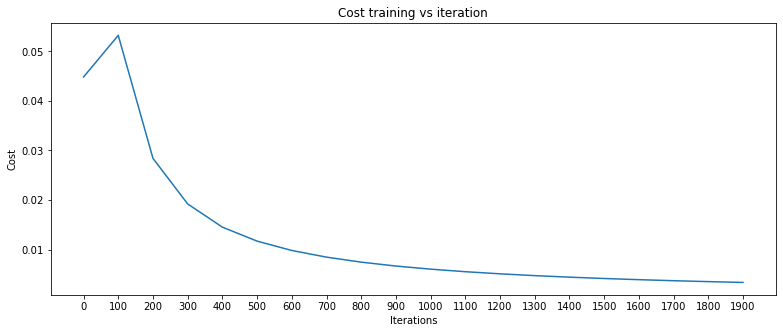

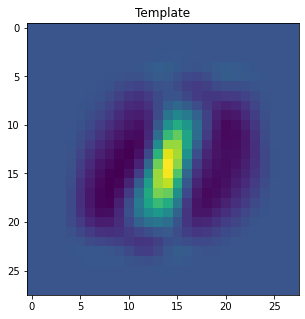

In [57]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]
    
# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')
